In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
ch = pd.read_csv('CH18mA.txt', delimiter='  ', header=None, names=['t', 'U'])
ch = ch.replace(',', '.', regex=True)
ch['t'] = ch['t'].astype(float)
ch['U'] = ch['U'].astype(float)
print(ch.head())
print(ch.dtypes)

      t         U
0   0.0  2.643127
1  20.0  2.749939
2  40.0  2.803345
3  60.0  2.845764
4  80.0  2.881775
t    float64
U    float64
dtype: object


C:\Users\Kamil\AppData\Local\Temp\ipykernel_24884\3718398518.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ch = pd.read_csv('CH18mA.txt', delimiter='  ', header=None, names=['t', 'U'])


In [12]:
dch = pd.read_csv('DCH18mA.txt', delimiter='  ', header=None, names=['t', 'U'])
dch = dch.replace(',', '.', regex=True)
dch['t'] = dch['t'].astype(float)
dch['U'] = dch['U'].astype(float)
print(dch.head())
print(dch.dtypes)

      t         U
0   0.0  4.194336
1  20.0  4.190979
2  40.0  4.190063
3  60.0  4.189148
4  80.0  4.188232
t    float64
U    float64
dtype: object


C:\Users\Kamil\AppData\Local\Temp\ipykernel_24884\1098421733.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dch = pd.read_csv('DCH18mA.txt', delimiter='  ', header=None, names=['t', 'U'])


Text(0.5, 1.0, '')

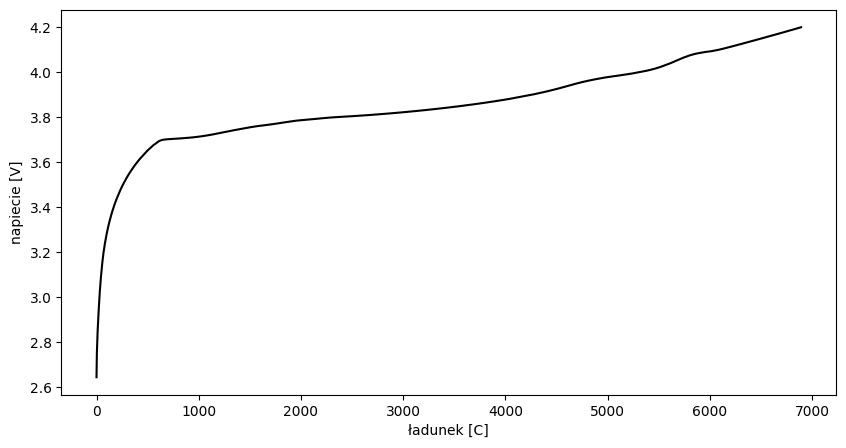

In [13]:
i = 0.18
ch['Q']=i*ch['t']


fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(ch['Q'], ch['U'], color='black', linestyle='solid', label='U(Q)')
ax.set_xlabel('ładunek [C]')
ax.set_ylabel('napiecie [V]')
ax.set_title('')

Text(0.5, 1.0, '')

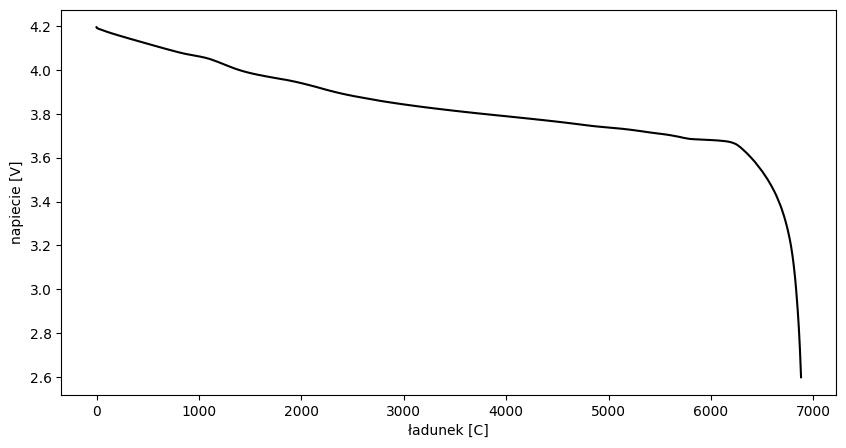

In [14]:
i = 0.18
dch['Q']=i*dch['t']


fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(dch['Q'], dch['U'], color='black', linestyle='solid', label='U(Q)')
ax.set_xlabel('ładunek [C]')
ax.set_ylabel('napiecie [V]')
ax.set_title('')

In [25]:
from scipy import integrate

E_ch = integrate.trapezoid(ch['U'], ch['Q'])
E_dch = integrate.trapezoid(dch['U'], dch['Q'])
print(E_ch, E_dch, E_dch/E_ch)

ch_sub = ch[(ch['U']<3.7) & (ch['U']>3.225)]
dch_sub = dch[(dch['U']<3.6) & (dch['U']>2.68)]
E_ch_sub = integrate.trapezoid(ch_sub['U'], ch_sub['Q'])
E_dch_sub = integrate.trapezoid(dch_sub['U'], dch_sub['Q'])
print(E_ch_sub, E_dch_sub, E_dch_sub/E_ch_sub)



26618.602616621996 26353.473983819997 0.9900397238494991
2044.8061721999998 1611.1922670000008 0.7879437615676427
